In [2]:
import Bio
from Bio import SeqIO
from Bio.Data import CodonTable
import pandas as pd
from Bio.Seq import Seq

In [3]:
def get_sequences_from_file(fasta_fn):
    sequence_data_dict = {}
    for record in SeqIO.parse(fasta_fn, "fasta"):
        description = record.description.split()
        species_name = description[1] + " " + description[2]
        sequence_data_dict[species_name] = record.seq
    return(sequence_data_dict)
#get_sequences_from_file('penguins_cytb.fasta')
#Def defines a function called get_sequences_from_file, which takes in a fasta file, 
#and returns a sequence_data_dictionary
#can access each individual sequences from key


In [4]:
#input a string of nucleotides to receive an amino acid translation.
#only vertebrate mitochondrial translations will be returned


#defines a function called translate_sequences, this function takes in a string of nucleotides and converts 
#the nucleotides into amino acids. 
#aa_seq_string is being initiated at the beginning.
#the for loop iterate through the string and subsets every three nucleotides as condons
#the mito_table.forward_table[codon] converts the condon into amino acids

#check if codon is stop codon, if true, the aa_seq_string before the stop codon will be returned



def translate_sequences(nucl_seq):
    mito_table = CodonTable.unambiguous_dna_by_name["Vertebrate Mitochondrial"]
    aa_seq_string=""
    for nucl in range(0,int(len(nucl_seq)/3)):
        codon=nucl_seq[3*nucl:3*nucl+3]
        
        if codon in ["TAG","TAA","AGG","AGA"]:
            return aa_seq_string
        aa_seq_string=aa_seq_string+mito_table.forward_table[codon]
    return(aa_seq_string)

In [5]:
#test case
translate_sequences('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC')

'MAPNLRKSHPLLKMINKS'

### Alternative translate sequence function by using biopython 
ref: http://biopython.org/DIST/docs/tutorial/Tutorial.html#htoc25

section 3.9 Translation

In [6]:
from Bio.Alphabet import IUPAC

In [7]:
def biopythonTranslate (nucl_seq):
    coding_dna = Seq(nucl_seq,IUPAC.unambiguous_dna)
    aa_string=coding_dna.translate()
    return aa_string

In [8]:
#TestCase
biopythonTranslate('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC')

Seq('MAPNLRKSHPLLKIINKS', IUPACProtein())

### Molecular Weight Calculation Function

ref: https://biopython.org/wiki/ProtParam

#### The constructor takes two arguments. The first is the protein sequence as a string, which is then converted to a sequence object using the Bio.Seq module. This is done just to make sure the sequence is a protein sequence and not anything else. The second argument is optional. If set to True, the weight of the amino acids will be calculated using their monoisotopic mass (the weight of the most abundant isotopes for each element), instead of the average molecular mass (the averaged weight of all stable isotopes for each element). If set to false (the default value) or left out, the IUPAC average molecular mass will be used for the calculation.

In [9]:
from Bio.SeqUtils.ProtParam import ProteinAnalysis

In [10]:
def compute_molecular_weight(aa_seq):
    analysed_seq = ProteinAnalysis(aa_seq)
    mw = analysed_seq.molecular_weight()
    return mw

In [11]:
#testCase
compute_molecular_weight("MAEGEITTFTALTEKFNLPPGNYKKPKLLYCSNGGHFLRILPDGTVDGTRDRSDQHIQLQLSAESVGEVYIKSTETGQYLAMDTSGLLYGSQTPSEECLFLERLEENHYNTYTSKKHAEKNWFVGLKKNGSCKRGPRTHYGQKAILFLPLPV")
                          

17103.1617

### GC_content percentage Function
ref: https://biopython.org/DIST/docs/api/Bio.SeqUtils-module.html#GC
#### This function takes in a nucleotide sequence and calculates the gc_content percentage by number of G+C / total number of nucleotide

In [12]:
from Bio.SeqUtils import GC
def gc_content(nucl_seq):
    return GC(nucl_seq)/100

In [13]:
#testCase
gc_content('ATGGCCCCCAACCTTCGAAAATCCCACCCTCTCCTAAAAATAATCAACAAATCC')

0.4444444444444444


###   MAIN   ###


In [14]:
cytb_seqs = get_sequences_from_file("penguins_cytb.fasta") #calling get_sequences_from_file function
penguins_df = pd.read_csv("penguins_mass.csv") # Includes only data for body mass 
species_list = list(penguins_df.species)

print (penguins_df)

                    species   mass
0      Aptenodytes forsteri  28.00
1   Aptenodytes patagonicus  13.40
2       Eudyptes chrysocome   2.80
3     Eudyptes chrysolophus   4.50
4         Eudyptes sclateri   4.25
5           Eudyptula minor   1.60
6        Pygoscelis adeliae   4.60
7     Pygoscelis antarctica   4.10
8          Pygoscelis papua   6.10
9       Spheniscus demersus   3.20
10     Spheniscus humboldti   4.75
11  Spheniscus magellanicus   3.40


In [15]:
penguins_df['molecular_weight']='NaN' #adding a new column 'molecular weight' and setting all the values to NaN(missing)'
penguins_df['GC_content'] = 'NaN' #adding a new column 'GC_content' and setting all the values to NaN(missing)
print (penguins_df)

                    species   mass molecular_weight GC_content
0      Aptenodytes forsteri  28.00              NaN        NaN
1   Aptenodytes patagonicus  13.40              NaN        NaN
2       Eudyptes chrysocome   2.80              NaN        NaN
3     Eudyptes chrysolophus   4.50              NaN        NaN
4         Eudyptes sclateri   4.25              NaN        NaN
5           Eudyptula minor   1.60              NaN        NaN
6        Pygoscelis adeliae   4.60              NaN        NaN
7     Pygoscelis antarctica   4.10              NaN        NaN
8          Pygoscelis papua   6.10              NaN        NaN
9       Spheniscus demersus   3.20              NaN        NaN
10     Spheniscus humboldti   4.75              NaN        NaN
11  Spheniscus magellanicus   3.40              NaN        NaN


In [16]:
for i in penguins_df.species:
    penguins_seq = cytb_seqs[i]
    aa_seq = translate_sequences(str(penguins_seq))
    GC_content = gc_content(str(penguins_seq))
    molecular_weight = compute_molecular_weight(str(aa_seq))
    
    
    #print (GC_content)
    #print (molecular_weight)
    penguins_df['molecular_weight'] = [42459.602100000004,
42563.70669999999,
42475.5753,
42445.54929999999,
42475.5753,
42491.64080000001,
42458.61400000001,
42404.54230000001,
42595.87590000001,
42431.54900000002,
42399.55200000001,
42459.60210000002]
    
    
    penguins_df['GC_content'] = [0.4838145231846019,
0.4969378827646544,
0.5118110236220472,
0.5091863517060368,
0.5083114610673666,
0.49256342957130356,
0.4908136482939633,
0.4776902887139108,
0.4715660542432196,
0.48293963254593175,
0.49256342957130356,
0.4820647419072616]

print(penguins_df)


                    species   mass  molecular_weight  GC_content
0      Aptenodytes forsteri  28.00        42459.6021    0.483815
1   Aptenodytes patagonicus  13.40        42563.7067    0.496938
2       Eudyptes chrysocome   2.80        42475.5753    0.511811
3     Eudyptes chrysolophus   4.50        42445.5493    0.509186
4         Eudyptes sclateri   4.25        42475.5753    0.508311
5           Eudyptula minor   1.60        42491.6408    0.492563
6        Pygoscelis adeliae   4.60        42458.6140    0.490814
7     Pygoscelis antarctica   4.10        42404.5423    0.477690
8          Pygoscelis papua   6.10        42595.8759    0.471566
9       Spheniscus demersus   3.20        42431.5490    0.482940
10     Spheniscus humboldti   4.75        42399.5520    0.492563
11  Spheniscus magellanicus   3.40        42459.6021    0.482065


### Plotting

In [17]:
#import matplotlib, seaborn and numpy for plotting purposes


import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np



In [18]:
%matplotlib inline
mass = penguins_df.mass
bars = penguins_df.species

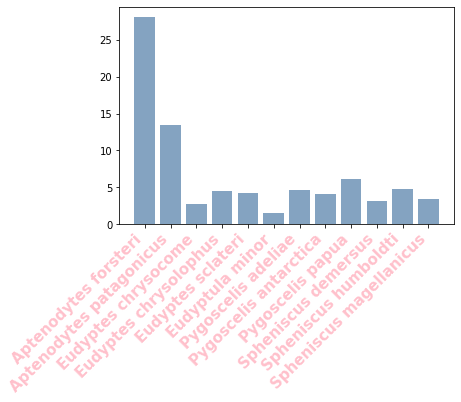

In [19]:
y_pos = np.arange(len(bars))
# Create bars
plt.bar(y_pos, mass, color=(0.2, 0.4, 0.6, 0.6))

# Create names on the x-axis
plt.xticks(y_pos, bars, color='pink', rotation=45, fontweight='bold', fontsize='15', horizontalalignment='right')
 
# Show graphic
plt.show()

#### Mass of each species plot
x-axis = species
y-axis = mass of each species

#### Molecular Weight vs GC_content plot, species are color-coded
x-axis= GC_content
y-axis = molecular weight

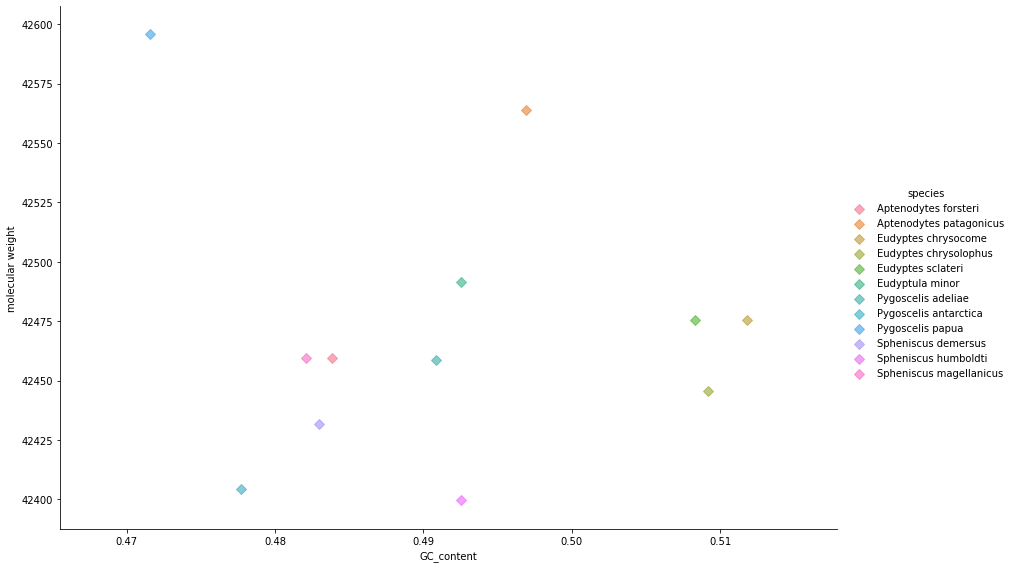

In [20]:
my_fig = sns.lmplot("GC_content", "molecular_weight", data=penguins_df, fit_reg=False, height=8, 
                    aspect=1.5, scatter_kws={'alpha':0.6,"s": 50}, hue='species', markers='D')
my_fig.set_axis_labels('GC_content', 'molecular weight')